In [3]:
import pandas as pd
import numpy as np
gbm_data_df = pd.read_csv("gbm-data.csv")#, header = None, names = ['y', 'x1', 'x2'])
print(gbm_data_df.shape)
gbm_data_df.head(10)

(3751, 1777)


,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.00,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.00,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.00,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.50,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.00,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0
5,0,0.133333,0.771035,0.20,0.25,0.122153,0.677398,0.267224,0.611112,0.701421,...,0,0,0,0,0,0,0,0,0,0
6,1,0.066700,0.567401,0.10,0.00,0.116578,0.689802,0.274886,0.548509,0.785429,...,0,0,0,0,0,0,0,0,0,0
7,1,0.133333,0.610057,0.15,0.00,0.105176,0.759602,0.313393,0.491790,0.756010,...,0,0,1,0,1,0,0,0,0,0
8,1,0.000000,0.776816,0.05,0.00,0.458446,0.738631,0.246347,0.067800,0.751861,...,0,0,0,0,0,0,0,0,0,0
9,0,0.100000,0.768150,0.10,0.25,0.262299,0.598972,0.377065,0.394514,0.673797,...,0,0,0,0,0,0,0,0,0,0


In [4]:
gbm_data = gbm_data_df.values
print(type(gbm_data))
print(gbm_data[:10,:])
print(gbm_data.shape)

<class 'numpy.ndarray'>
[[ 1.          0.          0.49700901 ...,  0.          0.          0.        ]
 [ 1.          0.36666667  0.60629148 ...,  0.          1.          0.        ]
 [ 1.          0.0333      0.48012427 ...,  0.          0.          0.        ]
 ..., 
 [ 1.          0.13333333  0.61005673 ...,  0.          0.          0.        ]
 [ 1.          0.          0.77681636 ...,  0.          0.          0.        ]
 [ 0.          0.1         0.76814957 ...,  0.          0.          0.        ]]
(3751, 1777)


In [5]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(gbm_data[:,1:], gbm_data[:,:1], test_size=0.8, random_state=241)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(750, 1776)
(3001, 1776)
(750, 1)
(3001, 1)


lr =  1
      Iter       Train Loss   Remaining Time 
         1           1.0190           34.11s
         2           0.9192           32.99s
         3           0.8272           32.11s
         4           0.7834           31.67s
         5           0.7109           31.51s
         6           0.6368           31.32s
         7           0.5797           30.93s
         8           0.5610           30.58s
         9           0.5185           30.29s
        10           0.4984           30.19s
        20           0.1999           27.88s
        30           0.1313           26.79s
        40           0.0790           25.62s
        50           0.0511           24.24s
        60           0.0352           22.92s
        70           0.0245           21.58s
        80           0.0162           20.34s
        90           0.0114           19.43s
       100           0.0077           18.21s
       200           0.0004            5.67s
clf classes:  [ 0.  1.]
(250, 750)
log loss on

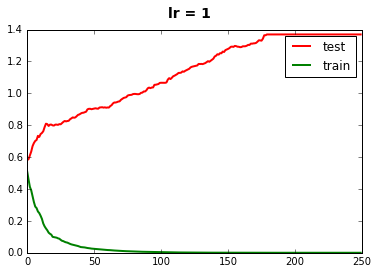

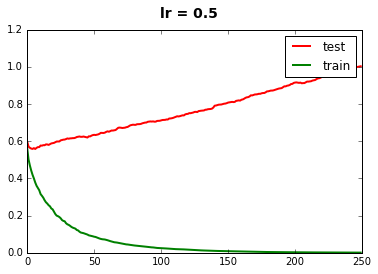

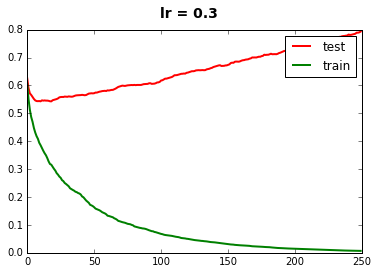

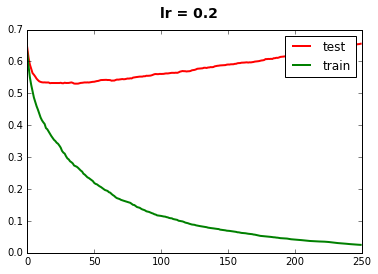

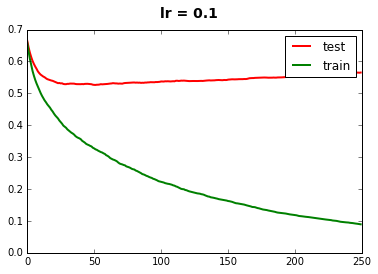

In [38]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt
%matplotlib inline

lr_ix = 0
n_iter = 250
train_loss = np.zeros([5, n_iter])
test_loss = np.zeros([5, n_iter])

for lr in [1, 0.5, 0.3, 0.2, 0.1] :
    
    print("lr = ", lr)
    
    clf = GradientBoostingClassifier(n_estimators = n_iter, verbose = True, random_state = 241, learning_rate = lr)
    clf.fit(X_train, np.ravel(y_train))
    print("clf classes: ", clf.classes_)
    
    staged_pred_train = np.zeros([len(clf.estimators_),len(X_train)])
    train_loss_all_samples = np.zeros([len(clf.estimators_),len(X_train)])
    print(train_loss_all_samples.shape)
        
    for i, pred in enumerate(clf.staged_decision_function(X_train)):
        #print(pred.shape)
        staged_pred_train[i,:] = 1 / (1 + np.exp(np.multiply(-1, np.ravel(pred))))
        train_loss_all_samples[i,:] = log_loss(y_train, staged_pred_train[i,:])
        train_loss[lr_ix, i] = np.mean(train_loss_all_samples[i,:])
        #print("log loss on train for i = ", i, " is ", train_loss[lr_ix, i])
        
    staged_pred_test = np.zeros([len(clf.estimators_),len(X_test)])
    test_loss_all_samples = np.zeros([len(clf.estimators_),len(X_test)])
        
    for i, pred in enumerate(clf.staged_decision_function(X_test)):
        #print(pred.shape)
        staged_pred_test[i,:] = 1 / (1 + np.exp(np.multiply(-1, np.ravel(pred))))
        test_loss_all_samples[i,:] = log_loss(y_test, staged_pred_test[i,:])
        test_loss[lr_ix, i] = np.mean(test_loss_all_samples[i,:])
        print("log loss on test for i = ", i, " is ", test_loss[lr_ix, i])
  
    plt.figure()
    plt.suptitle('lr = %s' % lr, fontsize=14, fontweight='bold')
    plt.plot(test_loss[lr_ix,:], 'r', linewidth=2)
    plt.plot(train_loss[lr_ix,:], 'g', linewidth=2)
    plt.legend(['test', 'train'])
    
    lr_ix = lr_ix + 1 #index of current learning rate


In [26]:
print(np.min(test_loss[3,:]))
print(np.argmin(test_loss[3,:]))

0.530439819735
36


In [45]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators = 36, random_state = 241)
clf.fit(X_train, np.ravel(y_train))

RF_pred_prob = clf.predict_proba(X_test)
print(clf.classes_)
print(RF_pred_prob.shape)
print(RF_pred_prob)

#RF_pred_prob_exp = 1 / (1 + np.exp(np.multiply(-1, np.ravel(RF_pred_prob[:,1]))))
RF_pred_prob_all_samples = log_loss(y_test, np.ravel(RF_pred_prob[:, 1]))
RF_loss = np.mean(RF_pred_prob_all_samples)
print(RF_loss)

[ 0.  1.]
(3001, 2)
[[ 0.30555556  0.69444444]
 [ 0.77777778  0.22222222]
 [ 0.61111111  0.38888889]
 ..., 
 [ 0.63888889  0.36111111]
 [ 0.69444444  0.30555556]
 [ 0.27777778  0.72222222]]
0.54138128618
